Threshold-based, Region-based, Clustering-based, Edge-based, Object-based (Other Methods (Watershed, ANN, PDE..) (Semantic, Instance, Salient object detection, Medical, Object detection)

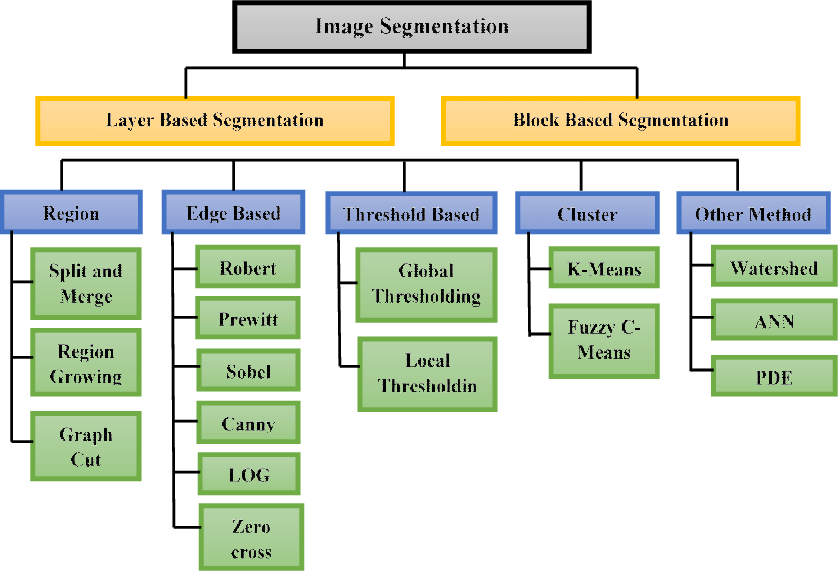

In [16]:
from IPython.display import Image
Image(filename="illustrative_images/types_image_segmentation.png")

In [17]:
input_img_path = "images/ADE_train_00001493.jpg"

# Threshold-based Segmentation
is a simple and intuitive approach to image segmentation that involves dividing an image into two or more regions based on a threshold value. This method is often used in grayscale images, where the intensity of each pixel is represented by a single value.

To perform threshold-based segmentation, you need to choose a threshold value and then apply it to the image. All pixels with intensity values above the threshold are assigned to one region, and all pixels with intensity values below the threshold are assigned to another region. This process can be repeated with different threshold values to create multiple regions.

Threshold-based segmentation is fast and easy to implement, but it can be sensitive to variations in image intensity and may not produce satisfactory results in all cases. It is often used as a pre-processing step before applying more sophisticated image segmentation methods.

For threshold-based segmentation, common evaluation metrics include accuracy, precision, and recall.

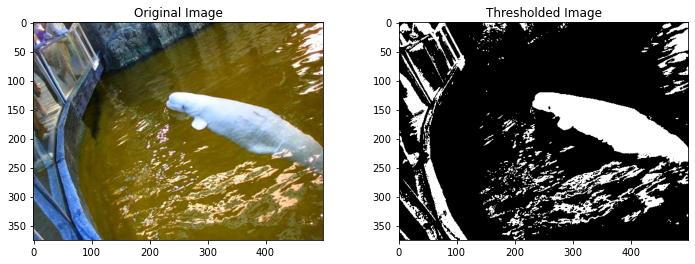

In [18]:
import cv2
from matplotlib import pyplot as plt

# Load the input image
img = cv2.imread(input_img_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a threshold to the image to create a binary image
threshold, thresholded_img = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY)

# Display the original and thresholded images
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(thresholded_img, cmap="gray")
plt.title("Thresholded Image")
plt.show()

This code loads an input image, converts it to grayscale, and applies a threshold to create a binary image with pixels that are either 0 or 255. The threshold value of 128 means that pixels with a value less than or equal to 128 will be set to 0, and pixels with a value greater than 128 will be set to 255. The resulting thresholded image is then displayed.

# Region-based Segmentation

Region-based segmentation is a type of image segmentation that involves dividing an image into multiple regions based on the characteristics of the pixels within each region. These characteristics can include intensity, color, texture, or any other feature that can be extracted from the image.

One popular region-based segmentation method is called "watershed segmentation," which is based on the idea of flooding an image from its minima (local minima or minima along the edges). Other region-based segmentation methods include "mean-shift segmentation" and "region growing."

Region-based segmentation is often used to segment images with objects that have irregular shapes or boundaries that are not clearly defined. It can also be useful for segmenting images with multiple objects that have similar characteristics and are close to each other.

Region-based segmentation: For region-based segmentation, common evaluation metrics include the F1 score, the Jaccard index, and the Rand index.

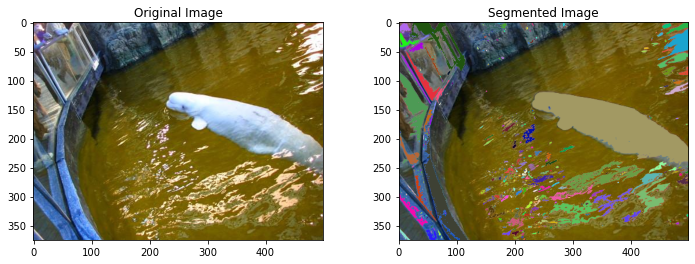

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the input image
img = cv2.imread(input_img_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Otsu's thresholding to create a binary image
threshold, thresholded_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find connected components in the image
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(thresholded_img)

# Create a copy of the original image
segmented_img = img.copy()

# Loop through the connected components and color each one separately
for i in range(1, num_labels):
    segmented_img[labels == i] = np.random.randint(0, 256, size=3)

# Display the original and segmented images
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title("Segmented Image")
plt.show()

This code loads an input image, converts it to grayscale, and applies Otsu's thresholding to create a binary image. It then uses the connectedComponentsWithStats function from OpenCV to find the connected components in the image and assign a unique label to each one. The code then colors each connected component separately and displays the original and segmented images.

# Clustering-based Segmentation
Clustering-based segmentation is a type of image segmentation that involves grouping pixels into clusters based on their similarity. To perform clustering-based segmentation, you need to extract features from the image and use them as input to a clustering algorithm, such as k-means or hierarchical clustering.

The clustering algorithm will then group the pixels into clusters based on their similarity, and each cluster can be treated as a separate region in the segmented image. Clustering-based segmentation can be useful for separating distinct regions of an image that have different characteristics, such as different colors or textures.

One advantage of clustering-based segmentation is that it does not require prior knowledge of the number of regions or the characteristics of the pixels within each region. However, it can be sensitive to the choice of clustering algorithm and the features used as input.

Clustering-based segmentation: For clustering-based segmentation, common evaluation metrics include the adjusted Rand index and the adjusted mutual information.


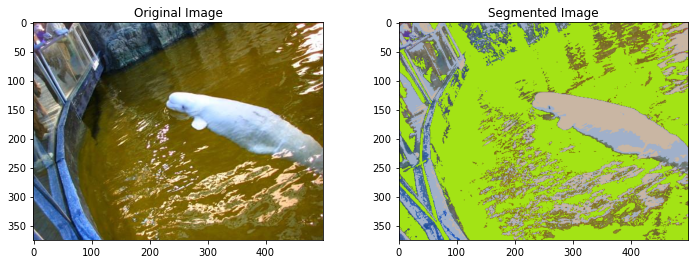

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

# Load the input image
img = cv2.imread(input_img_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Flatten the image into a feature vector
X = gray.flatten().reshape(-1, 1)

# Use K-Means clustering to divide the image into 4 clusters
kmeans = KMeans(n_clusters=4).fit(X)

# Create a copy of the original image
segmented_img = img.copy()

# Loop through the clusters and color each one separately
for i in range(3):
    segmented_img[kmeans.labels_.reshape(img.shape[:2]) == i] = np.random.randint(0, 256, size=3)

# Display the original and segmented images
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title("Segmented Image")
plt.show()

This code loads an input image, converts it to grayscale, and flattens it into a feature vector. It then uses K-Means clustering from the scikit-learn library to divide the image into 4 clusters. The code then colors each cluster separately and displays the original and segmented images.

# Edge-based Segmentation

Edge-based segmentation is a type of image segmentation that involves dividing an image into regions based on the edges or boundaries between different objects or regions. To perform edge-based segmentation, you need to detect the edges in the image and use them as the basis for separating the different regions.

Edge detection algorithms are used to identify the boundaries between different objects or regions in an image by identifying points where the intensity or color of the pixels changes significantly. These edges can then be used to separate the image into different regions or to trace the outlines of objects within the image.

Edge-based segmentation can be useful for segmenting images with objects that have well-defined edges or boundaries, such as shapes with sharp corners or distinct outlines. It can also be useful for extracting the outlines of objects in an image and creating a silhouette or outline representation of the objects.

Edge-based segmentation: For edge-based segmentation, common evaluation metrics include the F1 score, the precision-recall curve, and the receiver operating characteristic (ROC) curve.

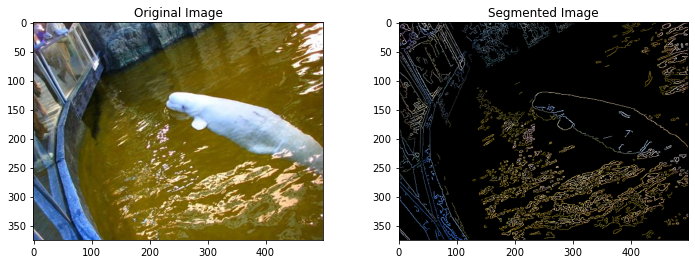

In [21]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the input image
img = cv2.imread(input_img_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Canny edge detection to the image
edges = cv2.Canny(gray, 100, 200)

# Create a copy of the original image
segmented_img = img.copy()

# Set all pixels in the segmented image to black except for the edges
segmented_img[edges == 0] = 0

# Display the original and segmented images
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(segmented_img, cmap="gray")
plt.title("Segmented Image")
plt.show()

This code loads an input image, converts it to grayscale, and applies Canny edge detection to find the edges in the image. It then creates a copy of the original image and sets all pixels in the copy to black except for the edges, which are retained. The resulting image is then displayed.

# Object-based Segmentation

Object-based segmentation is a type of image segmentation that involves dividing an image into regions based on the presence of objects within the image. This can be done by identifying the objects in the image and creating a separate region for each object.

Object-based segmentation can be useful for images with multiple objects of different classes or types, such as a photograph of a street scene with cars, pedestrians, and buildings. It can also be useful for separating objects that are close together or have similar characteristics, such as a group of people or a field of flowers.

There are many different approaches to object-based segmentation, including machine learning-based approaches that use supervised or unsupervised learning algorithms to identify the objects in the image. Other approaches may involve feature extraction, thresholding, or edge detection.

Object-based segmentation: For object-based segmentation, common evaluation metrics include the intersection over union (IoU) and the mean average precision (mAP).

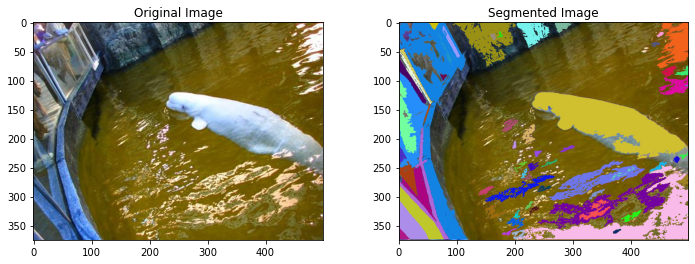

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load the input image
img = cv2.imread(input_img_path)

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect objects in the image using the MSER algorithm
mser = cv2.MSER_create()
regions, _ = mser.detectRegions(gray)

# Create a copy of the original image
segmented_img = img.copy()

# Loop through the detected objects and color each one separately
for region in regions:
    segmented_img[region[:, 1], region[:, 0]] = np.random.randint(0, 256, size=3)

# Display the original and segmented images
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(segmented_img)
plt.title("Segmented Image")
plt.show()

This code loads an input image, converts it to grayscale, and uses the MSER algorithm from OpenCV to detect objects in the image. It then creates a copy of the original image and colors each object separately. The resulting image is then displayed.

# Semantic and Instance Segmentation

Semantic segmentation: This type of segmentation classifies each pixel in an image into a predefined class. For example, in an image of a city, semantic segmentation can classify each pixel as belonging to a class such as "building," "road," or "sky."

Instance segmentation: This type of segmentation not only classifies each pixel into a predefined class, but it also separates different objects of the same class into distinct instances. For example, in an image of a group of people, instance segmentation can separate each person into a distinct instance.
